## Python Kernel (Please execute the R-Kernel model below:)

In [48]:
# Package implementation
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.gofplots import ProbPlot
import matplotlib.pyplot as plt
import pylab
import seaborn as sns

In [49]:
df = pd.read_csv("softdrink.csv")
df.insert(df.shape[1], 'Interept', 1)

In [50]:
Y = df["Time"]
X = df.drop(['Time'], axis=1)

In [51]:
multi_lin_reg = sm.OLS(Y, X).fit() 
print(multi_lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                   Time   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     261.2
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           4.69e-16
Time:                        10:17:00   Log-Likelihood:                -63.415
No. Observations:                  25   AIC:                             132.8
Df Residuals:                      22   BIC:                             136.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Cases          1.6159      0.171      9.464      0.0

In [52]:
#residual standard error/residual standard deviation
a = abs(Y-multi_lin_reg.predict(X)).values
a = a**2
(sum(a)/22)**0.5

3.2594734475800964

In [53]:
'''
a = abs(Y-multi_lin_reg.predict(X)).values
print(np.std(a, axis=None, dtype=None, out=None, ddof=3, keepdims=np._NoValue))
print((sum((a-np.mean(a))**2)/(np.shape(a)[0]-3))**(0.5))
'''

'\na = abs(Y-multi_lin_reg.predict(X)).values\nprint(np.std(a, axis=None, dtype=None, out=None, ddof=3, keepdims=np._NoValue))\nprint((sum((a-np.mean(a))**2)/(np.shape(a)[0]-3))**(0.5))\n'

In [54]:
# pvalues for parameters
multi_lin_reg.pvalues

Cases       3.254932e-09
Distance    6.312469e-04
Interept    4.417012e-02
dtype: float64

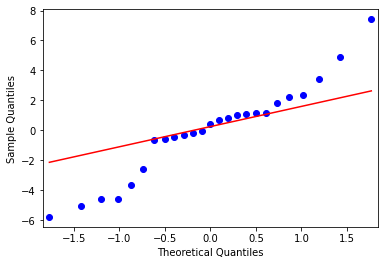

In [55]:
sm.qqplot(Y-multi_lin_reg.predict(X).values, line='q')
pylab.show()

In [56]:
# model values
model_fitted_y = multi_lin_reg.fittedvalues
# model residuals
model_residuals = multi_lin_reg.resid
# normalized residuals
model_norm_residuals = multi_lin_reg.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = multi_lin_reg.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = multi_lin_reg.get_influence().cooks_distance[0]

c:\users\andy\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


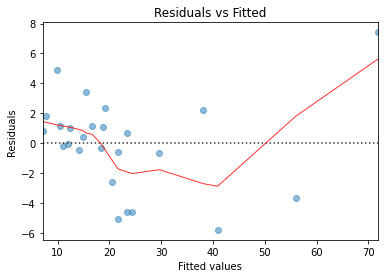

In [57]:
plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, Y, data=df,lowess=True,
                                  scatter_kws={'alpha': 0.5},line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

c:\users\andy\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


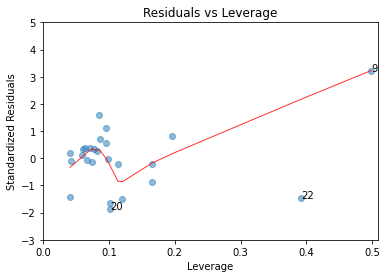

In [59]:
plot_lm_4 = plt.figure()
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals,scatter=False,ci=False,lowess=True,line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals');

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i+1,xy=(model_leverage[i],model_norm_residuals[i]));

## R Kernel

In [1]:
# read data
data = read.csv("softdrink.csv")
data

Time,Cases,Distance
<dbl>,<int>,<int>
16.68,7,560
11.50,3,220
12.03,3,340
14.88,4,80
13.75,6,150
18.11,7,330
8.00,2,110
17.83,7,210
79.24,30,1460


In [2]:
fit = lm(Time~Cases+Distance,data=data)
summary(fit)


Call:
lm(formula = Time ~ Cases + Distance, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7880 -0.6629  0.4364  1.1566  7.4197 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.341231   1.096730   2.135 0.044170 *  
Cases       1.615907   0.170735   9.464 3.25e-09 ***
Distance    0.014385   0.003613   3.981 0.000631 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.259 on 22 degrees of freedom
Multiple R-squared:  0.9596,	Adjusted R-squared:  0.9559 
F-statistic: 261.2 on 2 and 22 DF,  p-value: 4.687e-16


$$
\text { Residual standard error }=\sqrt{\frac{\sum_{i=1}^{n}\left(Y_{i}-\hat{\mathrm{Y}}_{i}\right)^{2}}{\mathrm{df}}}
$$

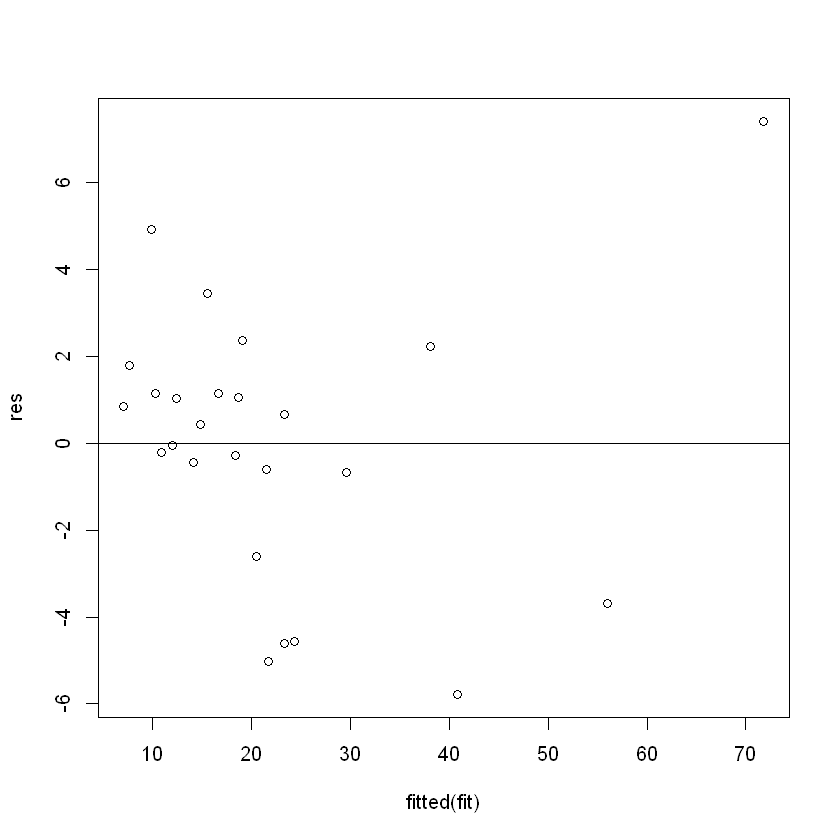

In [6]:
res = resid(fit)
plot(fitted(fit), res)
abline(0,0)

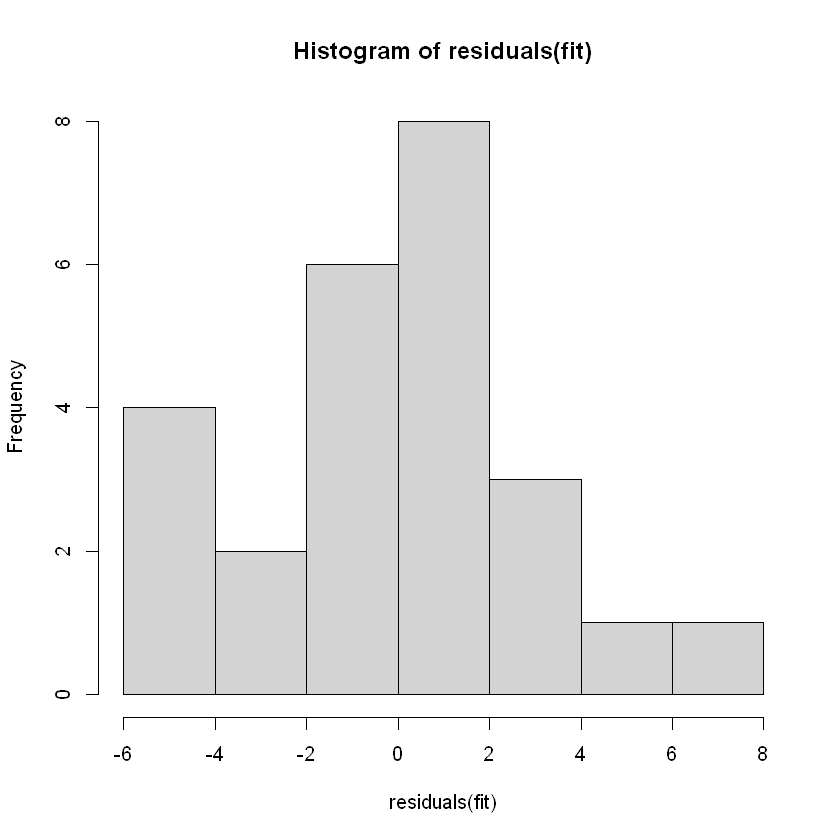

In [3]:
hist(residuals(fit))

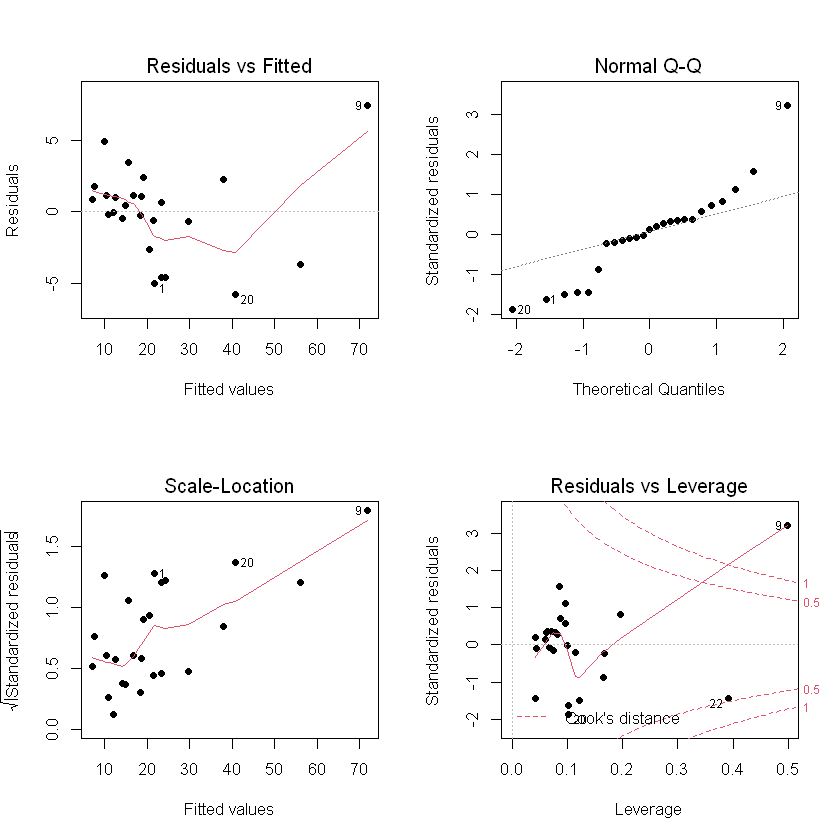

In [4]:
par(mfrow=c(2,2))
plot(fit,pch=16)

In [5]:
influence.measures(fit)

Influence measures of
	 lm(formula = Time ~ Cases + Distance, data = data) :

     dfb.1_ dfb.Cass dfb.Dstn   dffit cov.r   cook.d    hat inf
1  -0.18727  0.41131 -0.43486 -0.5709 0.871 1.00e-01 0.1018    
2   0.08979 -0.04776  0.01441  0.0986 1.215 3.38e-03 0.0707    
3  -0.00352  0.00395 -0.00285 -0.0052 1.276 9.46e-06 0.0987    
4   0.45196  0.08828 -0.27337  0.5008 0.876 7.76e-02 0.0854    
5  -0.03167 -0.01330  0.02424 -0.0395 1.240 5.43e-04 0.0750    
6  -0.01468  0.00179  0.00108 -0.0188 1.200 1.23e-04 0.0429    
7   0.07807 -0.02228 -0.01102  0.0790 1.240 2.17e-03 0.0818    
8   0.07120  0.03338 -0.05382  0.0938 1.206 3.05e-03 0.0637    
9  -2.57574  0.92874  1.50755  4.2961 0.342 3.42e+00 0.4983   *
10  0.10792 -0.33816  0.34133  0.3987 1.305 5.38e-02 0.1963    
11 -0.03427  0.09253 -0.00269  0.2180 1.172 1.62e-02 0.0861    
12 -0.03027 -0.04867  0.05397 -0.0677 1.291 1.60e-03 0.1137    
13  0.07237 -0.03562  0.01134  0.0813 1.207 2.29e-03 0.0611    
14  0.04952 -0.06709  0.06

## c

### It's the 9th point

### Next point would be the 22nd point.